In [1]:
# import basics and ahs specific components
import numpy as np
import matplotlib.pyplot as plt
from braket.ahs.atom_arrangement import AtomArrangement
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation
from ahs_utils import show_register, show_global_drive, show_final_avg_density, get_drive, get_ground_prob, get_avg_density
from braket.devices import LocalSimulator
from braket.aws import AwsDevice 

# Sets the device to Aquila - QuEra's first public QPU
qpu = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")

# Gives us the capabilities of Aquila
capabilities = qpu.properties.paradigm
rydberg = capabilities.rydberg
rydberg

Rydberg(c6Coefficient=Decimal('5.42E-24'), rydbergGlobal=RydbergGlobal(rabiFrequencyRange=(Decimal('0.0'), Decimal('15800000.0')), rabiFrequencyResolution=Decimal('400.0'), rabiFrequencySlewRateMax=Decimal('250000000000000.0'), detuningRange=(Decimal('-125000000.0'), Decimal('125000000.0')), detuningResolution=Decimal('0.2'), detuningSlewRateMax=Decimal('2500000000000000.0'), phaseRange=(Decimal('-99.0'), Decimal('99.0')), phaseResolution=Decimal('5E-7'), timeResolution=Decimal('1E-9'), timeDeltaMin=Decimal('5E-8'), timeMin=Decimal('0.0'), timeMax=Decimal('0.000004')))

In [3]:
data=[
  {
    "x": 37,
    "y": 27
  },
  {
    "x": 36,
    "y": 44
  },
  {
    "x": 36,
    "y": 63
  },
  {
    "x": 35,
    "y": 80
  },
  {
    "x": 50,
    "y": 54
  },
  {
    "x": 64,
    "y": 54
  },
  {
    "x": 66,
    "y": 25
  },
  {
    "x": 65,
    "y": 37
  },
  {
    "x": 63,
    "y": 66
  },
  {
    "x": 60,
    "y": 81
  },
  {
    "x": 104,
    "y": 56
  },
  {
    "x": 90,
    "y": 53
  },
  {
    "x": 82,
    "y": 67
  },
  {
    "x": 86,
    "y": 83
  },
  {
    "x": 100,
    "y": 84
  },
  {
    "x": 105,
    "y": 68
  },
  {
    "x": 120,
    "y": 57
  },
  {
    "x": 121,
    "y": 73
  },
  {
    "x": 121,
    "y": 88
  },
  {
    "x": 120,
    "y": 109
  },
  {
    "x": 131,
    "y": 57
  },
  {
    "x": 146,
    "y": 58
  },
  {
    "x": 157,
    "y": 70
  },
  {
    "x": 151,
    "y": 82
  },
  {
    "x": 136,
    "y": 87
  },
  {
    "x": 178,
    "y": 55
  },
  {
    "x": 179,
    "y": 68
  },
  {
    "x": 179,
    "y": 82
  },
  {
    "x": 177,
    "y": 104
  },
  {
    "x": 193,
    "y": 53
  },
  {
    "x": 207,
    "y": 54
  },
  {
    "x": 213,
    "y": 65
  },
  {
    "x": 202,
    "y": 77
  },
  {
    "x": 190,
    "y": 81
  },
  {
    "x": 228,
    "y": 53
  },
  {
    "x": 231,
    "y": 73
  },
  {
    "x": 235,
    "y": 93
  },
  {
    "x": 251,
    "y": 85
  },
  {
    "x": 259,
    "y": 65
  },
  {
    "x": 262,
    "y": 49
  },
  {
    "x": 249,
    "y": 97
  },
  {
    "x": 242,
    "y": 116
  },
  {
    "x": 236,
    "y": 135
  },
  {
    "x": 90,
    "y": 177
  },
  {
    "x": 88,
    "y": 192
  },
  {
    "x": 89,
    "y": 209
  },
  {
    "x": 89,
    "y": 226
  },
  {
    "x": 89,
    "y": 239
  },
  {
    "x": 105,
    "y": 177
  },
  {
    "x": 119,
    "y": 179
  },
  {
    "x": 128,
    "y": 192
  },
  {
    "x": 122,
    "y": 208
  },
  {
    "x": 107,
    "y": 212
  },
  {
    "x": 116,
    "y": 220
  },
  {
    "x": 127,
    "y": 232
  },
  {
    "x": 120,
    "y": 241
  },
  {
    "x": 101,
    "y": 245
  },
  {
    "x": 160,
    "y": 217
  },
  {
    "x": 158,
    "y": 231
  },
  {
    "x": 158,
    "y": 247
  },
  {
    "x": 161,
    "y": 194
  },
  {
    "x": 183,
    "y": 220
  },
  {
    "x": 183,
    "y": 236
  },
  {
    "x": 183,
    "y": 254
  },
  {
    "x": 197,
    "y": 217
  },
  {
    "x": 209,
    "y": 218
  },
  {
    "x": 211,
    "y": 228
  },
  {
    "x": 246,
    "y": 193
  },
  {
    "x": 245,
    "y": 209
  },
  {
    "x": 245,
    "y": 223
  },
  {
    "x": 245,
    "y": 238
  },
  {
    "x": 244,
    "y": 260
  },
  {
    "x": 228,
    "y": 212
  },
  {
    "x": 261,
    "y": 212
  },
  {
    "x": 283,
    "y": 192
  },
  {
    "x": 283,
    "y": 205
  },
  {
    "x": 283,
    "y": 221
  },
  {
    "x": 283,
    "y": 235
  },
  {
    "x": 283,
    "y": 250
  },
  {
    "x": 283,
    "y": 263
  },
  {
    "x": 296,
    "y": 223
  },
  {
    "x": 309,
    "y": 218
  },
  {
    "x": 317,
    "y": 230
  },
  {
    "x": 319,
    "y": 248
  },
  {
    "x": 318,
    "y": 265
  },
  {
    "x": 351,
    "y": 225
  },
  {
    "x": 343,
    "y": 225
  },
  {
    "x": 337,
    "y": 239
  },
  {
    "x": 336,
    "y": 260
  },
  {
    "x": 349,
    "y": 266
  },
  {
    "x": 358,
    "y": 256
  },
  {
    "x": 362,
    "y": 238
  },
  {
    "x": 361,
    "y": 223
  },
  {
    "x": 363,
    "y": 201
  },
  {
    "x": 364,
    "y": 176
  },
  {
    "x": 400,
    "y": 226
  },
  {
    "x": 388,
    "y": 224
  },
  {
    "x": 382,
    "y": 233
  },
  {
    "x": 380,
    "y": 257
  },
  {
    "x": 391,
    "y": 264
  },
  {
    "x": 405,
    "y": 260
  },
  {
    "x": 408,
    "y": 245
  },
  {
    "x": 409,
    "y": 234
  },
  {
    "x": 422,
    "y": 228
  },
  {
    "x": 422,
    "y": 240
  },
  {
    "x": 424,
    "y": 255
  },
  {
    "x": 434,
    "y": 269
  },
  {
    "x": 449,
    "y": 262
  },
  {
    "x": 456,
    "y": 245
  },
  {
    "x": 460,
    "y": 230
  },
  {
    "x": 443,
    "y": 272
  },
  {
    "x": 435,
    "y": 290
  },
  {
    "x": 428,
    "y": 305
  },
  {
    "x": 419,
    "y": 320
  },
  {
    "x": 53,
    "y": 315
  },
  {
    "x": 56,
    "y": 328
  },
  {
    "x": 62,
    "y": 340
  },
  {
    "x": 68,
    "y": 352
  },
  {
    "x": 77,
    "y": 342
  },
  {
    "x": 82,
    "y": 329
  },
  {
    "x": 92,
    "y": 312
  },
  {
    "x": 67,
    "y": 366
  },
  {
    "x": 68,
    "y": 386
  },
  {
    "x": 68,
    "y": 403
  },
  {
    "x": 107,
    "y": 361
  },
  {
    "x": 92,
    "y": 364
  },
  {
    "x": 86,
    "y": 383
  },
  {
    "x": 94,
    "y": 398
  },
  {
    "x": 105,
    "y": 406
  },
  {
    "x": 116,
    "y": 397
  },
  {
    "x": 119,
    "y": 379
  },
  {
    "x": 121,
    "y": 360
  },
  {
    "x": 115,
    "y": 409
  },
  {
    "x": 137,
    "y": 363
  },
  {
    "x": 137,
    "y": 381
  },
  {
    "x": 138,
    "y": 402
  },
  {
    "x": 138,
    "y": 422
  },
  {
    "x": 152,
    "y": 373
  },
  {
    "x": 164,
    "y": 364
  },
  {
    "x": 174,
    "y": 372
  },
  {
    "x": 178,
    "y": 385
  },
  {
    "x": 177,
    "y": 404
  },
  {
    "x": 179,
    "y": 425
  },
  {
    "x": 196,
    "y": 365
  },
  {
    "x": 197,
    "y": 377
  },
  {
    "x": 196,
    "y": 394
  },
  {
    "x": 195,
    "y": 416
  },
  {
    "x": 198,
    "y": 430
  },
  {
    "x": 208,
    "y": 378
  },
  {
    "x": 217,
    "y": 372
  },
  {
    "x": 234,
    "y": 378
  },
  {
    "x": 237,
    "y": 389
  },
  {
    "x": 235,
    "y": 406
  },
  {
    "x": 237,
    "y": 424
  },
  {
    "x": 260,
    "y": 376
  },
  {
    "x": 260,
    "y": 387
  },
  {
    "x": 257,
    "y": 407
  },
  {
    "x": 261,
    "y": 423
  },
  {
    "x": 262,
    "y": 357
  },
  {
    "x": 301,
    "y": 378
  },
  {
    "x": 285,
    "y": 378
  },
  {
    "x": 279,
    "y": 389
  },
  {
    "x": 279,
    "y": 405
  },
  {
    "x": 284,
    "y": 421
  },
  {
    "x": 298,
    "y": 432
  },
  {
    "x": 305,
    "y": 431
  },
  {
    "x": 317,
    "y": 380
  },
  {
    "x": 344,
    "y": 331
  },
  {
    "x": 343,
    "y": 345
  },
  {
    "x": 343,
    "y": 360
  },
  {
    "x": 342,
    "y": 379
  },
  {
    "x": 342,
    "y": 390
  },
  {
    "x": 341,
    "y": 407
  },
  {
    "x": 340,
    "y": 424
  },
  {
    "x": 367,
    "y": 375
  },
  {
    "x": 354,
    "y": 390
  },
  {
    "x": 359,
    "y": 405
  },
  {
    "x": 369,
    "y": 417
  },
  {
    "x": 378,
    "y": 427
  },
  {
    "x": 399,
    "y": 323
  },
  {
    "x": 398,
    "y": 332
  },
  {
    "x": 399,
    "y": 344
  },
  {
    "x": 399,
    "y": 364
  },
  {
    "x": 400,
    "y": 378
  },
  {
    "x": 401,
    "y": 396
  },
  {
    "x": 400,
    "y": 415
  },
  {
    "x": 400,
    "y": 432
  },
  {
    "x": 400,
    "y": 457
  }
]



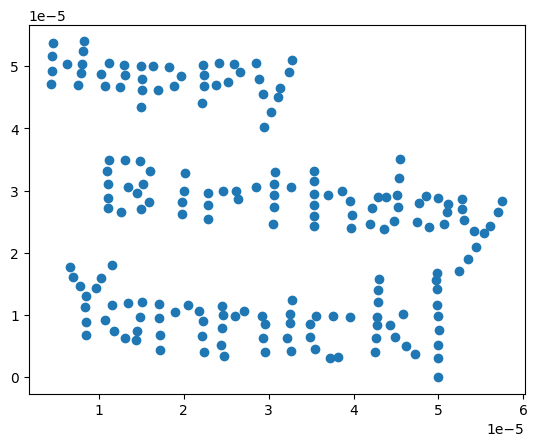

In [4]:
import matplotlib.pyplot as plt

x_values = [(d["x"]*50e-6/400) for d in data]
y_values = [((-1*d["y"]+457)*50e-6/400) for d in data]

# Creating a scatter plot using Matplotlib
plt.scatter(x_values, y_values)

# Adding labels and title
# plt.xlabel("X values")
# plt.ylabel("Y values")
# plt.title("Scatter plot of X vs Y")

# Displaying the plot
plt.show()

In [11]:
x_vals = np.array(x_values)
y_vals = np.array(y_values)
ordered_pairs = [np.array([x,y]) for x, y in zip(x_vals, y_vals)]
print(ordered_pairs)

[array([4.625e-06, 5.375e-05]), array([4.5000e-06, 5.1625e-05]), array([4.500e-06, 4.925e-05]), array([4.3750e-06, 4.7125e-05]), array([6.2500e-06, 5.0375e-05]), array([8.0000e-06, 5.0375e-05]), array([8.25e-06, 5.40e-05]), array([8.125e-06, 5.250e-05]), array([7.8750e-06, 4.8875e-05]), array([7.5e-06, 4.7e-05]), array([1.3000e-05, 5.0125e-05]), array([1.125e-05, 5.050e-05]), array([1.025e-05, 4.875e-05]), array([1.075e-05, 4.675e-05]), array([1.2500e-05, 4.6625e-05]), array([1.3125e-05, 4.8625e-05]), array([1.5e-05, 5.0e-05]), array([1.5125e-05, 4.8000e-05]), array([1.5125e-05, 4.6125e-05]), array([1.50e-05, 4.35e-05]), array([1.6375e-05, 5.0000e-05]), array([1.8250e-05, 4.9875e-05]), array([1.9625e-05, 4.8375e-05]), array([1.8875e-05, 4.6875e-05]), array([1.700e-05, 4.625e-05]), array([2.225e-05, 5.025e-05]), array([2.2375e-05, 4.8625e-05]), array([2.2375e-05, 4.6875e-05]), array([2.2125e-05, 4.4125e-05]), array([2.4125e-05, 5.0500e-05]), array([2.5875e-05, 5.0375e-05]), array([2.662

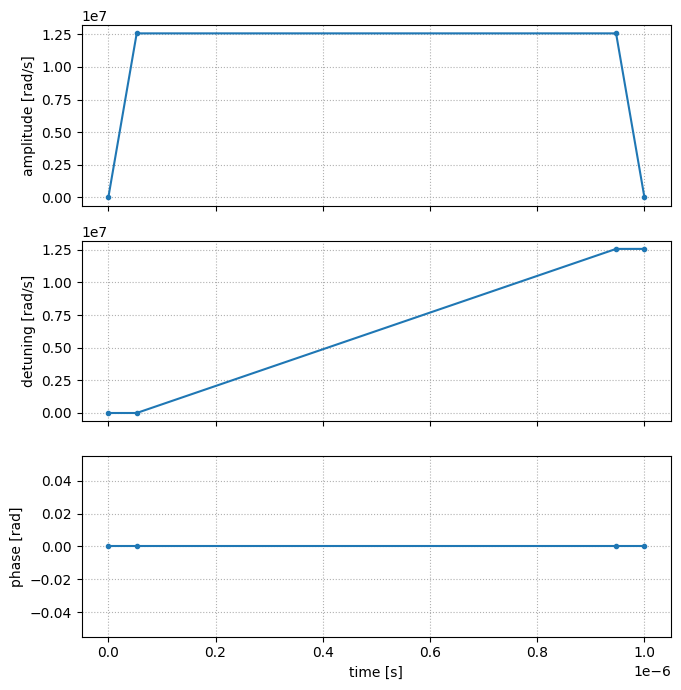

In [26]:
# Hamiltonian drive construction

total_time = 1.0e-6 # total evolution time in s

max_slew = float(rydberg.rydbergGlobal.rabiFrequencySlewRateMax) # rad/s^2 advised to only use 95% of max for now
omega_min= 0  # rad/s
omega_max = np.pi*4.0e6 # rad/s
ramp_time = omega_max/(max_slew*0.95) # microseconds

time_points = [0, ramp_time, total_time-ramp_time, total_time]

detuning_min = omega_min
detuning_max = omega_max 

omega_values = [omega_min, omega_max, omega_max, omega_min]  # piecewise linear
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]  # piecewise linear

phase_values = [0, 0, 0, 0]  # piecewise constant
drive = get_drive(time_points, omega_values, detuning_values, phase_values)

# We can view the drive pattern by running the below function.
show_global_drive(drive)

In [27]:
# Define the Rydberg blockade radius corresponding to our previously defined Omega
c6 = float(rydberg.dict()["c6Coefficient"])
Rb = (c6/omega_max)**(1/6)
Rb

8.69223722541915e-06

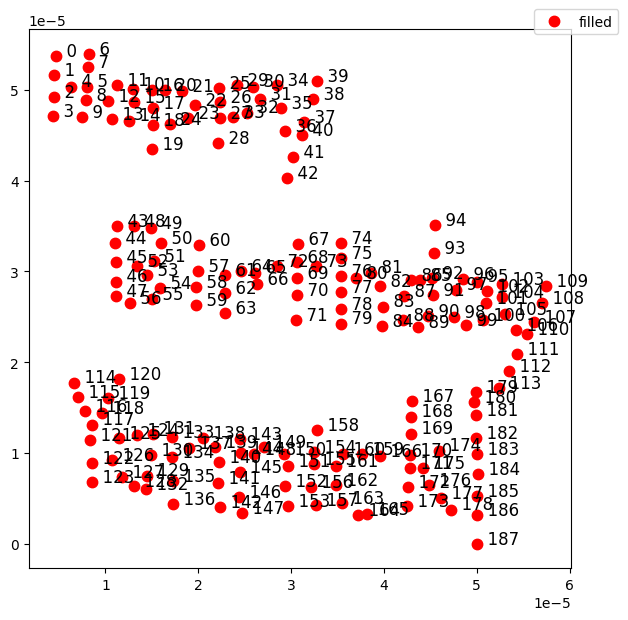

In [28]:
# Now we create the register of atoms
atoms = AtomArrangement()

# Construct the birthday atom configuration
for i in range(len(ordered_pairs)):

    atoms.add(ordered_pairs[i])

# View the arrangement of atoms. Use blockade_radius=Rb to draw connecting line between blockaded atoms
show_register(atoms)

In [ ]:
ahs_program = AnalogHamiltonianSimulation(
    register=atoms, 
    hamiltonian=drive
)

d_ahs_program = ahs_program.discretize(qpu)
shots = 500 # or maybe this should be set to your age?
qpu_task = qpu.run(d_ahs_program, shots=shots)